#**Recursive Feature Elimination (RFE)**

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Loan_Data.csv')
df = df[['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']]
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
df.nunique()

Gender            2
Married           2
Dependents        4
Education         2
Self_Employed     2
Credit_History    2
Property_Area     3
Loan_Status       2
dtype: int64

In [ ]:
df["Loan_Status"].isna().sum()

0

In [ ]:
df["Credit_History"].isna().sum()

50

In [ ]:
df.isna().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [ ]:
df.mode()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,Yes,0,Graduate,No,1.0,Semiurban,Y


In [ ]:
df["Gender"].mode()[0]

'Male'

In [ ]:
# fill null values
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [ ]:
df.isna().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,1
610,1,1,3,0,0,1,0,1
611,1,1,1,0,0,1,2,1
612,1,1,2,0,0,1,2,1


In [ ]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
chi_scores = chi2(X, y)

In [ ]:
chi_scores

(array([3.62343084e-02, 1.78242499e+00, 8.59527587e-02, 3.54050246e+00,
        7.28480330e-03, 2.60058772e+01, 3.77837464e-01]),
 array([8.49032435e-01, 1.81851834e-01, 7.69386856e-01, 5.98873168e-02,
        9.31982300e-01, 3.40379591e-07, 5.38762867e-01]))

<Axes: >

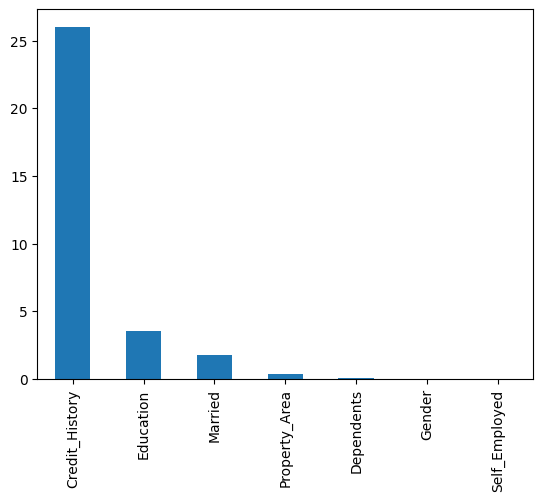

In [ ]:
# higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=X.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

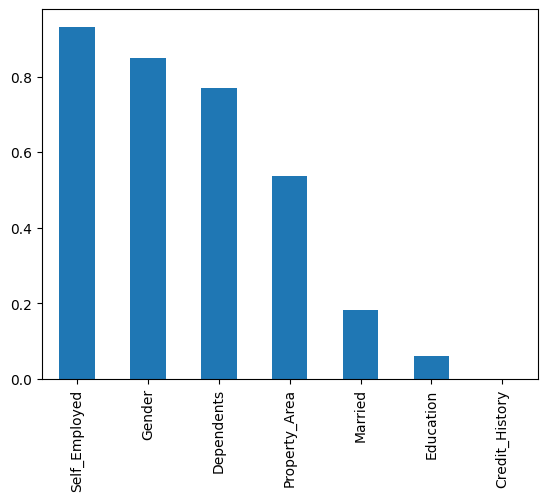

In [ ]:
# if p-value > 0.05, lower the importance
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,1,2,1
1,1,1,1,0,0,1,0,0
2,1,1,0,0,1,1,2,1
3,1,1,0,1,0,1,2,1
4,1,0,0,0,0,1,2,1


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# input split
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [ ]:
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3) #3 features to select
rfe.fit(X, y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [ ]:
for i, col in zip(range(X.shape[1]), X.columns):
    print(f"{col} selected={rfe.support_[i]} rank={rfe.ranking_[i]}")

Gender selected=False rank=4
Married selected=False rank=5
Dependents selected=False rank=3
Education selected=True rank=1
Self_Employed selected=False rank=2
Credit_History selected=True rank=1
Property_Area selected=True rank=1


In [ ]:
rfe.support_

array([False, False, False,  True, False,  True,  True])

In [ ]:
rfe.ranking_

array([4, 5, 3, 1, 2, 1, 1])

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# input split
X = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']
knn = KNeighborsClassifier(n_neighbors=7)

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
sfs = SFS(knn, k_features=3, forward=False, floating=False, scoring='accuracy', cv=0, n_jobs=-1)

feature_names = ('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area')

sfs = sfs.fit(X, y)

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)",[0.7785016286644951],0.778502,"(Gender, Married, Dependents, Education, Self_...",NaN,0.0,NaN
6,"(0, 1, 2, 3, 5, 6)",[0.7882736156351792],0.788274,"(Gender, Married, Dependents, Education, Credi...",NaN,0.0,NaN
5,"(0, 1, 2, 3, 5)",[0.7671009771986971],0.767101,"(Gender, Married, Dependents, Education, Credi...",NaN,0.0,NaN
4,"(0, 2, 3, 5)",[0.7703583061889251],0.770358,"(Gender, Dependents, Education, Credit_History)",NaN,0.0,NaN
3,"(0, 3, 5)",[0.8094462540716613],0.809446,"(Gender, Education, Credit_History)",NaN,0.0,NaN


In [ ]:
sfs = SFS(knn, k_features=3, forward=False, floating=False, scoring='accuracy', cv=3, n_jobs=-1)  #cv=3, means 3 cv_scores

feature_names = ('Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area')

sfs = sfs.fit(X, y)

In [ ]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
7,"(0, 1, 2, 3, 4, 5, 6)","[0.7609756097560976, 0.7268292682926829, 0.745...",0.744301,"(Gender, Married, Dependents, Education, Self_...",0.031396,0.013952,0.009865
6,"(0, 1, 2, 3, 4, 5)","[0.8, 0.7902439024390244, 0.8137254901960784]",0.801323,"(Gender, Married, Dependents, Education, Self_...",0.021675,0.009632,0.006811
5,"(1, 2, 3, 4, 5)","[0.8, 0.7853658536585366, 0.8137254901960784]",0.799697,"(Married, Dependents, Education, Self_Employed...",0.026058,0.01158,0.008188
4,"(1, 2, 3, 5)","[0.6878048780487804, 0.7853658536585366, 0.833...",0.768835,"(Married, Dependents, Education, Credit_History)",0.136259,0.060551,0.042816
3,"(1, 2, 5)","[0.6731707317073171, 0.7853658536585366, 0.833...",0.763957,"(Married, Dependents, Credit_History)",0.151032,0.067116,0.047458
